<a href="https://colab.research.google.com/github/Raptor-sj22/ML-Training/blob/main/logistic-regression/Logistic_Regression_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install required libraries

!pip install keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  scikit-learn~=1.4.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


In [ ]:
#@title Importing Packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format

In [ ]:
#@title Loading and Analyzing the dataset
rice_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/Rice_Cammeo_Osmancik.csv")

All_FEATURES = [
    'Area',
    'Perimeter',
    'Major_Axis_Length',
    'Minor_Axis_Length',
    'Eccentricity',
    'Convex_Area',
    'Extent'
]


# adding a new row to dataset for binary label: Cammeo = 1, Osmancik = 0
rice_dataset['Class_Bool'] = (rice_dataset['Class'] == 'Cammeo').astype(int)

# Split features and labels
XX = rice_dataset[All_FEATURES]
yy = rice_dataset['Class_Bool']

#Data Analyzes and Reports
print("\n\nRaw Data\n")
display(rice_dataset)

print("\n\nData Information\n" )
display(rice_dataset.info())

print("\n\nData Statistical Analyze\n")
display(rice_dataset.describe())


# Calculate mutual information
mi = mutual_info_classif(XX, yy)
mi_df = pd.DataFrame({'Feature': XX.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print("\n\n Mutal Information for Classification\n")
print(mi_df)

#@title Plotting the correlation matrix
numeric_rice_dataset = rice_dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_rice_dataset.corr()

# Plot the correlation matrix using Plotly Express
fig = px.imshow(corr_matrix,text_auto=".2f",color_continuous_scale='bluered',title='Correlation Matrix Heatmap',aspect='auto')
fig.update_layout(width=1000, height=1000)
fig.show()



Raw Data



,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Class_Bool
0,15231,525.58,229.75,85.09,0.93,15617,0.57,Cammeo,1
1,14656,494.31,206.02,91.73,0.90,15072,0.62,Cammeo,1
2,14634,501.12,214.11,87.77,0.91,14954,0.69,Cammeo,1
3,13176,458.34,193.34,87.45,0.89,13368,0.64,Cammeo,1
4,14688,507.17,211.74,89.31,0.91,15262,0.65,Cammeo,1
...,...,...,...,...,...,...,...,...,...
3805,11441,415.86,170.49,85.76,0.86,11628,0.68,Osmancik,0
3806,11625,421.39,167.71,89.46,0.85,11904,0.69,Osmancik,0
3807,12437,442.50,183.57,86.80,0.88,12645,0.63,Osmancik,0
3808,9882,392.30,161.19,78.21,0.87,10097,0.66,Osmancik,0




Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
 8   Class_Bool         3810 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 268.0+ KB


None



Data Statistical Analyze



,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class_Bool
count,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00
mean,12667.73,454.24,188.78,86.31,0.89,12952.50,0.66,0.43
std,1732.37,35.60,17.45,5.73,0.02,1776.97,0.08,0.49
min,7551.00,359.10,145.26,59.53,0.78,7723.00,0.50,0.00
25%,11370.50,426.14,174.35,82.73,0.87,11626.25,0.60,0.00
50%,12421.50,448.85,185.81,86.43,0.89,12706.50,0.65,0.00
75%,13950.00,483.68,203.55,90.14,0.90,14284.00,0.73,1.00
max,18913.00,548.45,239.01,107.54,0.95,19099.00,0.86,1.00




 Mutal Information for Classification

             Feature  Mutual Information
2  Major_Axis_Length                0.50
1          Perimeter                0.47
5        Convex_Area                0.39
0               Area                0.39
4       Eccentricity                0.23
3  Minor_Axis_Length                0.08
6             Extent                0.04


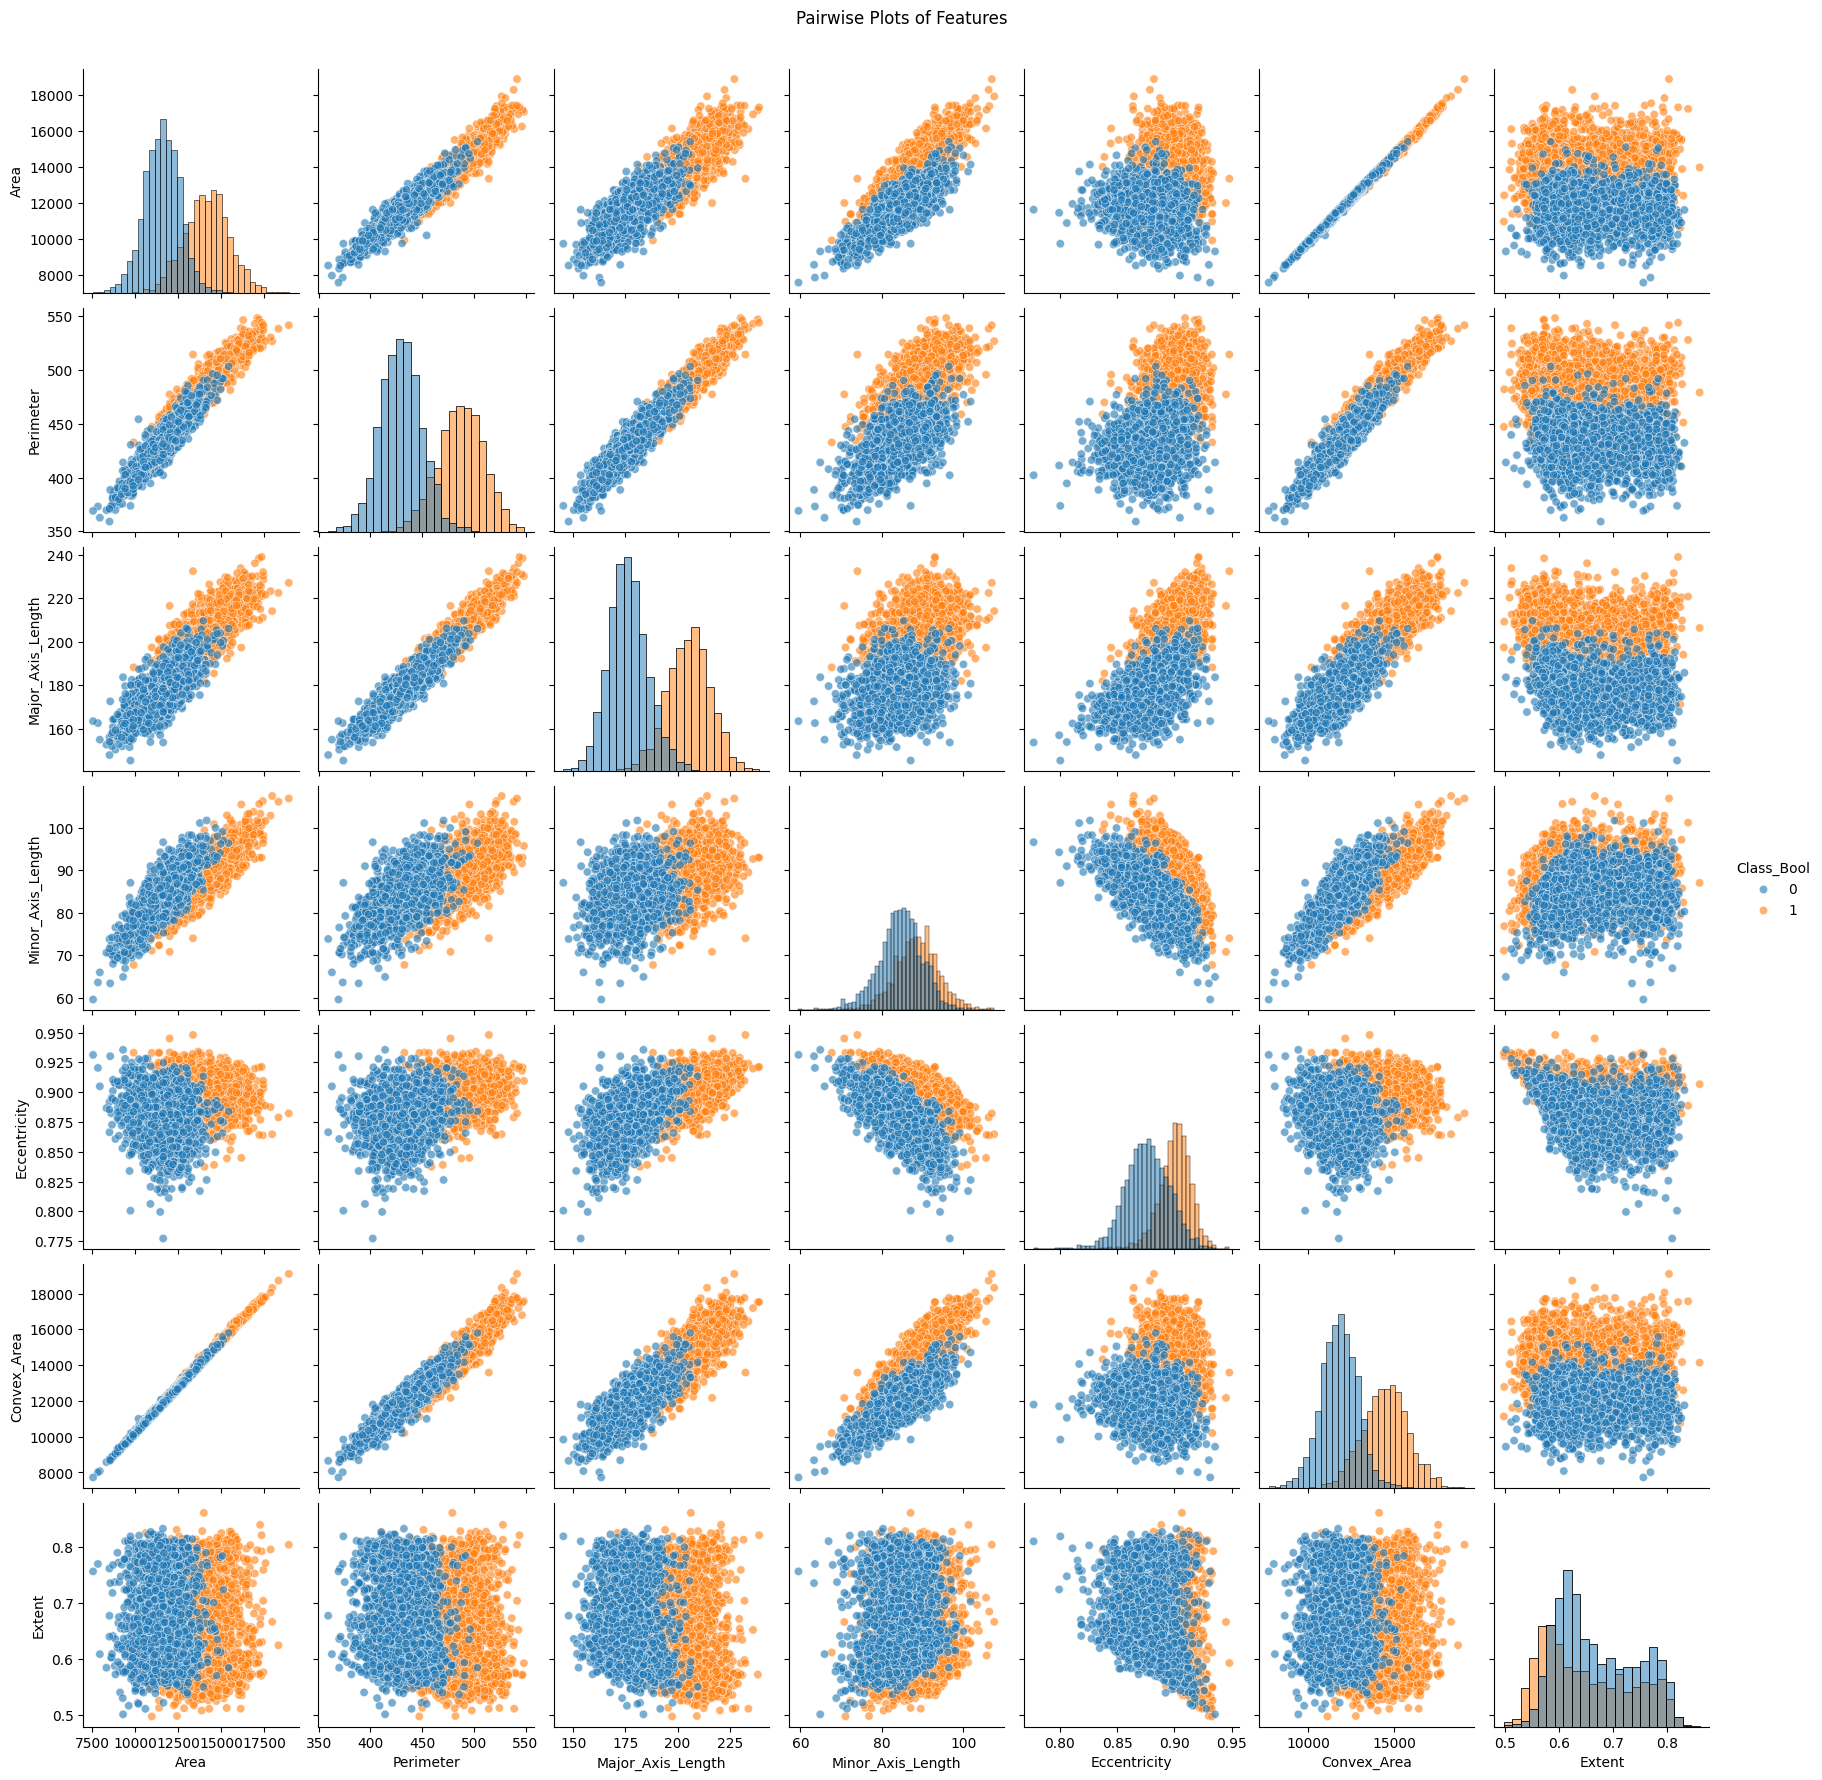

In [ ]:
#@title Pairwise Plotting features
sns.pairplot(rice_dataset, hue='Class_Bool', diag_kind='hist', plot_kws={'alpha':0.6})
plt.suptitle('Pairwise Plots of Features', y=1.02)
plt.show()

In [ ]:
#@title Input Selected Features
INPUT_FEATURES=[
    'Eccentricity',
    'Major_Axis_Length',
    'Area',
]
X = rice_dataset[INPUT_FEATURES]
y = rice_dataset['Class_Bool']

In [ ]:
#@title  Preprocessing Data (Normalization, Splitting, and Randomize)

# Normalize features (Z-score) using sikit
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitand Randomize Dataset to Training, Validiating, and Test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Show the Splits
print("\n\n X_train")
display(pd.DataFrame(X_train))

print("\n\n X_val")
display(pd.DataFrame(X_val))

print("\n\n X_test")
display(pd.DataFrame(X_test))



 X_train


,0,1,2
0,1.24,0.31,-0.41
1,0.23,0.09,0.05
2,1.12,1.10,0.66
3,0.49,-0.86,-1.33
4,-1.08,-1.37,-1.21
...,...,...,...
2281,1.32,2.35,2.28
2282,0.40,0.67,0.71
2283,1.01,1.98,2.09
2284,-0.57,-1.06,-1.05




 X_val


,0,1,2
0,-0.42,-0.50,-0.39
1,-0.70,0.99,1.98
2,0.07,0.45,0.65
3,-0.38,-0.53,-0.43
4,-2.04,-0.81,-0.03
...,...,...,...
757,0.36,1.49,1.93
758,-1.42,-0.99,-0.55
759,-0.01,-0.28,-0.35
760,-1.09,-0.80,-0.45




 X_test


,0,1,2
0,0.12,-0.08,-0.14
1,1.10,1.14,0.77
2,-0.06,0.69,1.09
3,-1.58,-0.84,-0.29
4,-0.23,-0.22,-0.10
...,...,...,...
757,0.50,0.60,0.57
758,0.54,0.15,-0.13
759,-0.19,-0.69,-0.72
760,0.92,1.13,0.94


In [ ]:

# ========================
# HYPERPARAMETERS — EDIT HERE
# ========================
LEARNING_RATE = 0.001
EPOCHS = 60
BATCH_SIZE = 100
CLASSIFICATION_THRESHOLD = 0.35




# Build a simple binary classification model
def create_model(input_shape, learning_rate):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_shape,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.BinaryAccuracy(name='accuracy', threshold=CLASSIFICATION_THRESHOLD),
            keras.metrics.Precision(name='precision', thresholds=CLASSIFICATION_THRESHOLD),
            keras.metrics.Recall(name='recall', thresholds=CLASSIFICATION_THRESHOLD),
            keras.metrics.AUC(name='auc')
        ]
    )
    return model


# Create and train the model
model = create_model(len(INPUT_FEATURES), LEARNING_RATE)

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val)
)


Epoch 1/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6886 - auc: 0.9132 - loss: 0.4875 - precision: 0.5871 - recall: 0.9853 - val_accuracy: 0.7283 - val_auc: 0.9353 - val_loss: 0.4577 - val_precision: 0.6243 - val_recall: 0.9824
Epoch 2/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7067 - auc: 0.9226 - loss: 0.4683 - precision: 0.5838 - recall: 0.9875 - val_accuracy: 0.7520 - val_auc: 0.9409 - val_loss: 0.4429 - val_precision: 0.6460 - val_recall: 0.9824
Epoch 3/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7265 - auc: 0.9383 - loss: 0.4448 - precision: 0.6051 - recall: 0.9897 - val_accuracy: 0.7664 - val_auc: 0.9453 - val_loss: 0.4291 - val_precision: 0.6601 - val_recall: 0.9824
Epoch 4/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7540 - auc: 0.9464 - loss: 0.4291 - precision: 0.6251 - recall: 0.9927 - val_accuracy: 0.7861 - val_auc: 0.9491 - val_loss: 0.4161 - val_precision: 0.6802 - val_recall: 0.9824
Epoch 5/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

24/24 - 0s - 4ms/step - accuracy: 0.9226 - auc: 0.9786 - loss: 0.1982 - precision: 0.8943 - recall: 0.9343

Test set metrics:
loss: 0.1982
compile_metrics: 0.9226


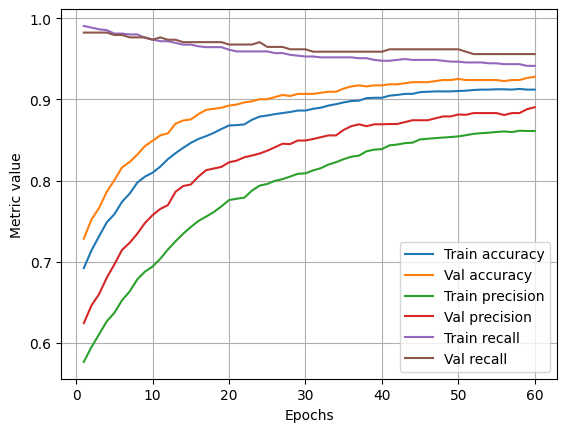

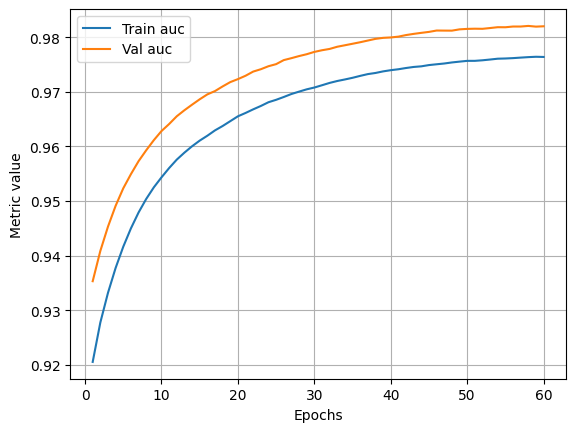

In [ ]:

# Evaluate the model on the test set
test_results = model.evaluate(X_test, y_test, verbose=2)
print("\nTest set metrics:")
for name, value in zip(model.metrics_names, test_results):
    print(f"{name}: {value:.4f}")

# Plot training metrics
def plot_metrics(history, metrics):
    epochs = range(1, len(history.history[metrics[0]]) + 1)
    for metric in metrics:
        plt.plot(epochs, history.history[metric], label=f'Train {metric}')
        if 'val_' + metric in history.history:
            plt.plot(epochs, history.history['val_' + metric], label=f'Val {metric}')
    plt.xlabel('Epochs')
    plt.ylabel('Metric value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metrics(history, ['accuracy', 'precision', 'recall'])
plot_metrics(history, ['auc'])


In [ ]:
# Install dependencies (if not already)
!pip install tensorflow matplotlib scikit-learn --quiet

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1️⃣ Generate a synthetic 2D dataset
X, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.0, random_state=42
)

# 2️⃣ Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 3️⃣ Define a simple regression-based classifier (logistic regression)
model = Sequential([
    Dense(1, input_dim=X_poly.shape[1], activation='sigmoid', kernel_regularizer=regularizers.l2(0))  # logistic regression
])

# 4️⃣ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5️⃣ Train the model
model.fit(X_poly, y, epochs=200, verbose=0)

# 6️⃣ Visualize the dataset and decision boundary

# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Transform grid points to polynomial feature space
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)

# Predict probabilities for each grid point
Z = model.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))

# Decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'orange'])
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=1)

# Scatter plot of dataset
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', edgecolors='k', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='orange', edgecolors='k', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset with Polynomial Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'regularizers' is not defined

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2497 - loss: 0.9591  
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2551 - loss: 0.8958 
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2880 - loss: 0.8537 
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3813 - loss: 0.7904 
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5056 - loss: 0.7536 
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5712 - loss: 0.7734 
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6205 - loss: 0.7097 
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6306 - loss: 0.6943 
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6563 - loss: 0.6539 
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6586 - loss: 0.6474 
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7278 - loss: 0.6114 
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

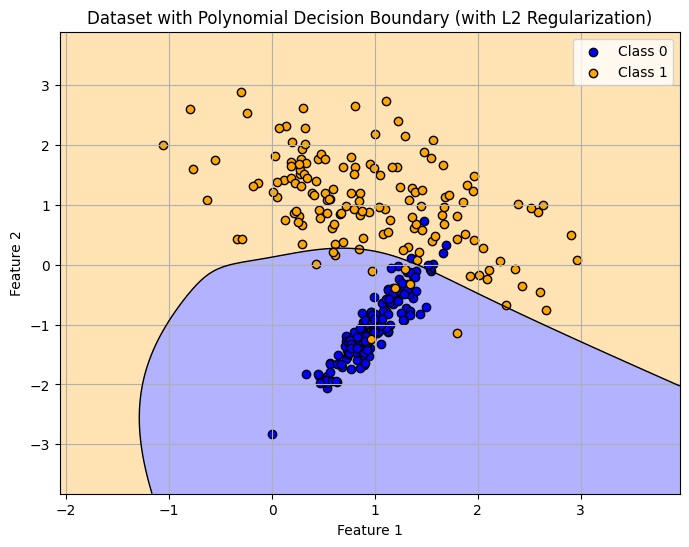

In [ ]:
# Install dependencies (if not already)
!pip install tensorflow matplotlib scikit-learn --quiet

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# 1️⃣ Generate a synthetic 2D dataset
X, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.0, random_state=42
)

# 2️⃣ Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

# 3️⃣ Define a simple regression-based classifier (logistic regression with L2 regularization)
model = Sequential([
    Dense(1,
          input_dim=X_poly.shape[1],
          activation='sigmoid',
          kernel_regularizer=regularizers.l2(.1))  # L2 regularization (lambda = 0.01)
])

# 4️⃣ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5️⃣ Train the model
model.fit(X_poly, y, epochs=200, verbose=1)

# 6️⃣ Visualize the dataset and decision boundary

# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Transform grid points to polynomial feature space
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)

# Predict probabilities for each grid point
Z = model.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))

# Decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'orange'])
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=1)

# Scatter plot of dataset
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', edgecolors='k', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='orange', edgecolors='k', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset with Polynomial Decision Boundary (with L2 Regularization)")
plt.legend()
plt.grid(True)
plt.show()


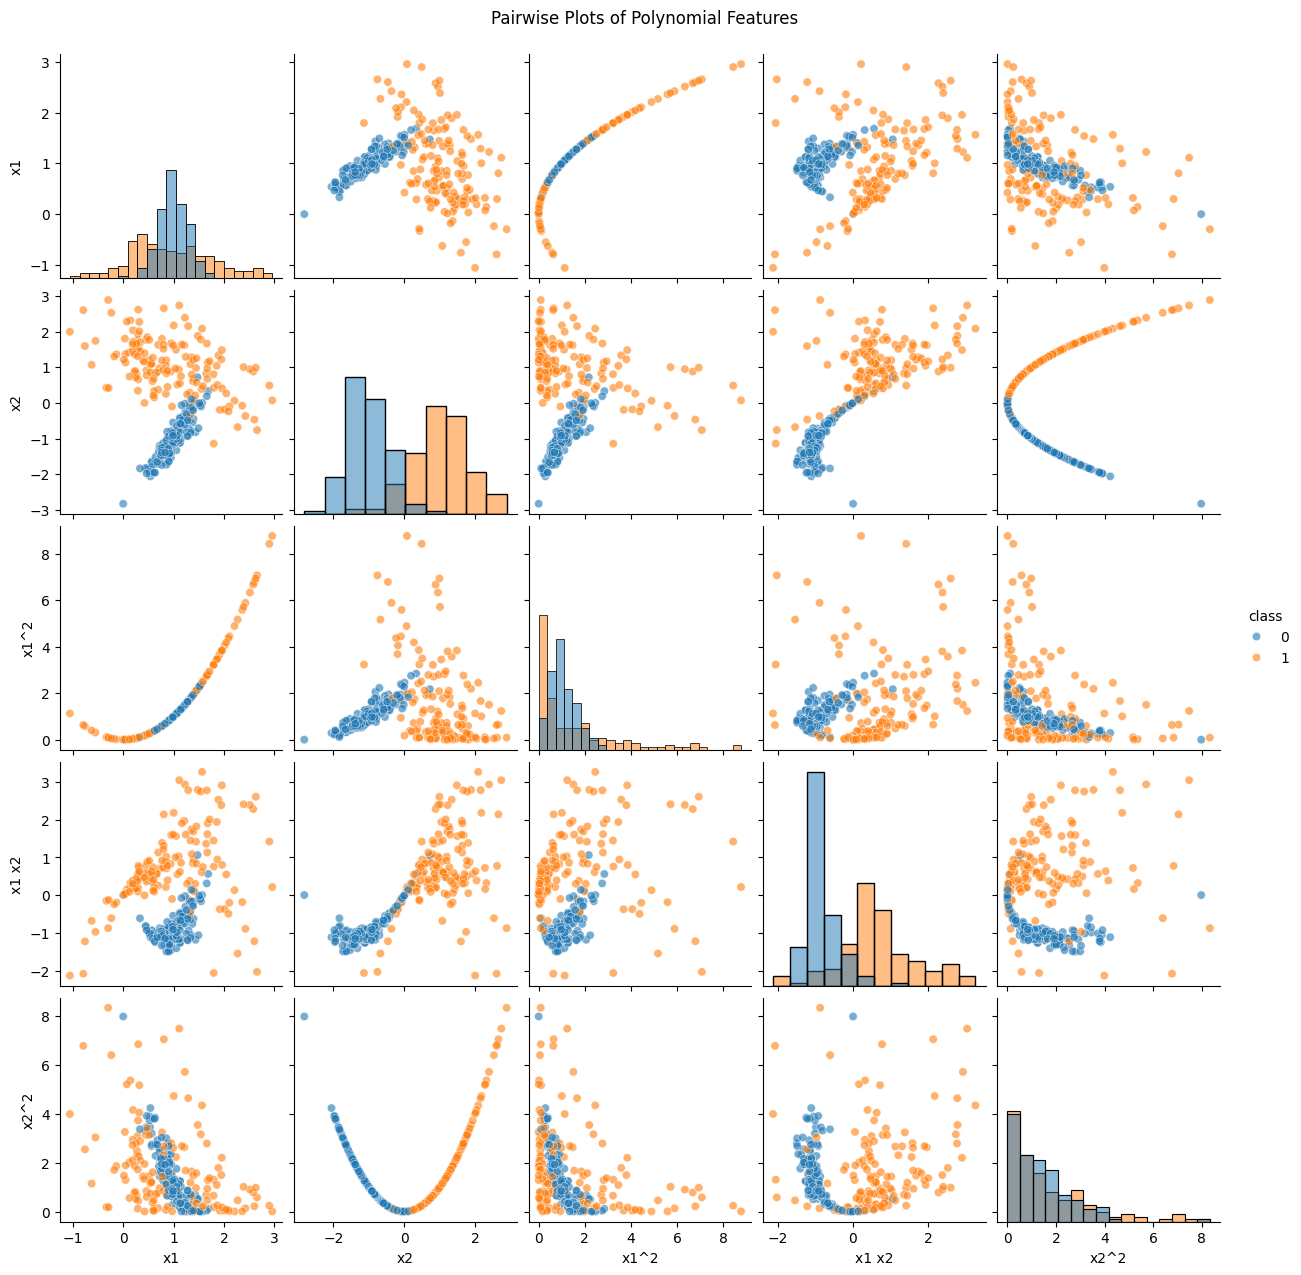

In [ ]:
# Install dependencies (if not already)
!pip install matplotlib scikit-learn --quiet

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import pandas as pd

# 1️⃣ Generate a synthetic 2D dataset
X, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.0, random_state=42
)

# 2️⃣ Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 3️⃣ Prepare DataFrame for easy plotting
feature_names = poly.get_feature_names_out(['x1', 'x2'])
df = pd.DataFrame(X_poly, columns=feature_names)
df['class'] = y

# 4️⃣ Pairplot of all feature pairs colored by class
sns.pairplot(df, hue='class', diag_kind='hist', plot_kws={'alpha':0.6})
plt.suptitle('Pairwise Plots of Polynomial Features', y=1.02)
plt.show()
